# Teil 1: Einführung in das Projekt und den Datensatz

In der ersten Woche des Kurses geht es um eine Einführung in das Projekt und den Datensatz. Der Fokus liegt auf der Kugelgewindespindel und dem zugehörigen Datensatz, der für das Erstellen des maschinellen Lernmodells verwendet wird. Die Teilnehmer lernen, wie sie die Rohdaten sammeln, vorbereiten und bereinigen, um sie für die Analyse und das Modelltraining vorzubereiten.

Im Rahmen der explorativen Datenanalyse wird der Datensatz genauer untersucht und verschiedene statistische Verfahren eingesetzt, um Muster und Trends in den Daten zu erkennen. Dadurch erhalten die Teilnehmer ein tiefes Verständnis für den Datensatz und können später im Kurs bessere Entscheidungen bei der Modellierung treffen.

Insgesamt bietet die erste Woche des Kurses eine solide Grundlage für die folgenden Wochen, in denen die Teilnehmer Deep Learning-Methoden erlernen und auf den Datensatz anwenden werden.


## Inhaltsübersicht

### 1.1 Überblick über die Kugelgewindespindel
* Einführung in die Funktionsweise einer Kugelgewindespindel
* Bedeutung der Fehlererkennung für die Kugelgewindespindel in der Industrie
* Vorstellung des zu analysierenden Datensatzes
### 1.2 Datensammlung und -vorverarbeitung
* Sammeln von Rohdaten für die Kugelgewindespindel
### 1.3 Explorative Datenanalyse
* Visualisierung der Daten für die Kugelgewindespindel
* Beschreibung von Mustern und Trends in den Daten
* Datenbereinigung und -transformation, einschließlich Entfernung falscher Werte und Anpassung von Datentypen
### 1.4 Zusammenfassung
* Zusammenfassung der behandelten Themen und Werkzeuge
* Ausblick auf die folgenden Wochen des Kurses

## 1.1 Überblick über die Kugelgewindespindel
Die Kugelgewindespindel ist ein wichtiger Bestandteil von Werkzeugmaschinen und anderen Präzisionsmaschinen in der Fertigungsindustrie. Sie wird verwendet, um lineare Bewegungen in rotatorische Bewegungen umzuwandeln und umgekehrt. Eine typische Kugelgewindespindel besteht aus einer Spindel und einer Mutter, die beide mit einer oder mehreren Reihen von Kugellagern ausgestattet sind. Durch Drehen der Spindel wird die Mutter entlang der Spindelachse bewegt, wodurch eine lineare Bewegung erzeugt wird.

## 1.2 Datensammlung  -vorverarbeitung

Für die Generierung der Bilddaten in diesem Projekt wurde ein 5-Achs-Versuchsstand verwendet, der am Institut vorhanden war (siehe folgende Abbildung):
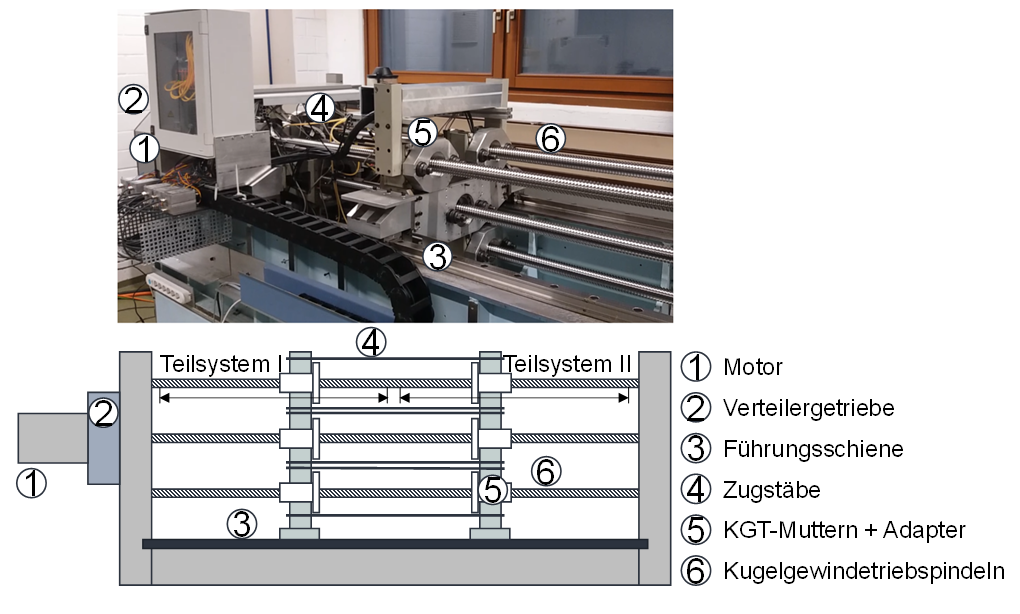
In diesem Versuchsstand wurde ein Sensorsystem integriert, das aus fünf Hauptkomponenten besteht: einem Kamerasystem zur Bildaufnahme, einem Diffusor zur Streuung des Lichts und zur Sicherstellung von gleichmäßigen Beleuchtungsbedingungen, einem Montageflansch zur Befestigung des Systems an der Kugelgewindespindel-Mutter, einem Gehäuse zur Integration der Einzelkomponenten und einer Lichtquelle als Beleuchtungssystem. Eine Python-basierte Kommunikationsarchitektur wurde entwickelt, um eine Kommunikation mit dem Versuchsstandsrechner herzustellen und automatisiert Aufnahmen zu machen.
Hierzu wurde folgender Sensor- und Kommunikationsaufbau verwendet:
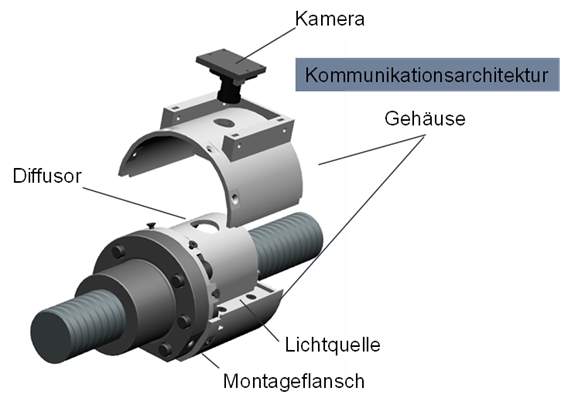

In den Versuchen wurden Kugelgewindespindeln mit einer Länge von 2500 mm und einem Durchmesser von 32 mm der Firma Bosch Rexroth verwendet. Die Spindeln wurden unter einer Belastung von 12kN in Lebensdauerversuchen verschlissen. Dabei wurden jeweils zwei Muttern über jede Spindel geführt, und die überrollten Bereiche wurden getrennt, sodass sich 12 Teilsysteme ergaben, die unabhängig voneinander belastet werden konnten.

Die Verschleißentwicklung der Spindeln wurde dokumentiert, wobei Temperatursensoren an den Mutternflanschen angebracht wurden, um die Betriebstemperatur zu überwachen. Die Versuchsläufe wurden unterbrochen, wenn die Temperatur eines Sensors 60 °C überstieg oder der in der SPS gemessene Motorstrom einen kritischen Schwellwert von 12 Ampere überschritt. Diese Grenzwerte wurden auf Basis von Expertenwissen empirisch festgelegt und beschreiben das mechanische Versagen der Komponente bzw. das Verklemmen des Systems.

Die entstandenen Bilddaten zeigen die gesamte Verschleißhistorie der Kugelgewindespindeln ab Versuchsbeginn bis zum Ausfall des technischen Systems KGT. Dabei wurden die Entstehung und Entwicklung von insgesamt 54 Pittings beobachtet und dokumentiert. Ein Pitting entsteht zu einem bestimmten Zeitpunkt und wächst dann kontinuierlich bis zum mechanischen Ausfall des Systems.

## 1.3 Explorative Datenanalyse

In diesem Kapitel werden wir uns mit der explorativen Datenanalyse (EDA) für Bild-Daten befassen, einem kritischen Schritt bei der Entwicklung eines maschinellen Lernmodells. Wir werden uns insbesondere auf die Visualisierung der Bilder konzentrieren, um die Daten besser zu verstehen und zu interpretieren.
Da wir uns auf Bilddaten konzentrieren, werden wir die Visualisierungen und Analysemethoden an die Besonderheiten des Datensatzes anpassen. Zum Beispiel können wir bei Bildern eine Vielzahl von Merkmalen wie Größe, Farbtiefe und Struktur analysieren.


### Aufgabe:
Schaut euch die Datensätze an und schreibt eine Python Funktion, welche die folgenden Größen eurer Dantensätze bestimmt:
* Bild Dimension
* Bild Tiefe
* Bild Kanäle
* Datenpunkte pro Datensatz

Haben alle Daten dieselben Dimensionen?

In [2]:
import skimage.io
import matplotlib.pyplot as plt

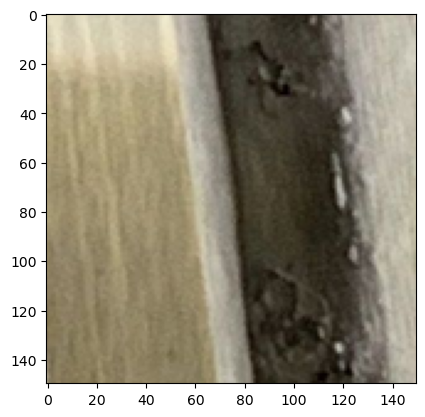

Bild Dimensionen: (150, 150)
Bild Tiefe (Farbtiefe pro Kanal): 8
Bild Kanäle: 3
Datenpunkte pro Datensatz: 67500


In [3]:
img = skimage.io.imread("data/KGT_pitting_simplified/P (2).png")
plt.imshow(img)
plt.show()

dimensionen = img.shape[:2]
farbtiefe_pro_kanal = img.dtype.itemsize * 8
kanäle = img.shape[2] if len(img.shape) == 3 else 1
datenpunkte_pro_datensatz = img.size

print("Bild Dimensionen:", dimensionen)
print("Bild Tiefe (Farbtiefe pro Kanal):", farbtiefe_pro_kanal)
print("Bild Kanäle:", kanäle)
print("Datenpunkte pro Datensatz:", datenpunkte_pro_datensatz)

## Aufgabe:
Falls nicht alle Daten die selben Größen haben muss der Datensatz bereinigt werden. Schreibt eine Funktion welche die namen aller Bilder mit den falschen Größen zurückgibt.
Die Entsprechenden Bilder sollten dann gelöscht werden, entweder manuell oder mit einer Funktion.